# Validation with DAGs

Candidate DAGs
1. **Constraint-based**
  - **DAG**: [('PEG', 'HSPC'), ('PEG', 'FRR'), ('PEG', 'ESM'), ('PEG', 'SIZE'), ('PEG', 'TFR'), ('PEG', 'PDI'), ('PEG', 'CHOL'), ('HSPC', 'FRR'), ('HSPC', 'ESM'), ('HSPC', 'SIZE'), ('HSPC', 'TFR'), ('HSPC', 'PDI'), ('HSPC', 'CHOL'), ('AQUEOUS', 'HSPC'), ('AQUEOUS', 'FRR'), ('AQUEOUS', 'ESM'), ('AQUEOUS', 'SIZE'), ('AQUEOUS', 'TFR'), ('AQUEOUS', 'PDI'), ('AQUEOUS', 'CHOL'), ('FRR', 'ESM'), ('FRR', 'SIZE'), ('FRR', 'TFR'), ('FRR', 'PDI'), ('FRR', 'CHOL'), ('ESM', 'SIZE'), ('ESM', 'TFR'), ('ESM', 'PDI'), ('ESM', 'CHOL'), ('SIZE', 'TFR'), ('SIZE', 'PDI'), ('SIZE', 'CHOL'), ('TFR', 'PDI'), ('TFR', 'CHOL'), ('PDI', 'CHOL')]
  - **DAG**: [('HSPC', 'PEG'), ('HSPC', 'FRR'), ('HSPC', 'ESM'), ('HSPC', 'SIZE'), ('HSPC', 'TFR'), ('HSPC', 'PDI'), ('HSPC', 'CHOL'), ('PEG', 'AQUEOUS'), ('PEG', 'FRR'), ('PEG', 'ESM'), ('PEG', 'SIZE'), ('PEG', 'TFR'), ('PEG', 'PDI'), ('PEG', 'CHOL'), ('AQUEOUS', 'FRR'), ('AQUEOUS', 'ESM'), ('AQUEOUS', 'SIZE'), ('AQUEOUS', 'TFR'), ('AQUEOUS', 'PDI'), ('AQUEOUS', 'CHOL'), ('FRR', 'ESM'), ('FRR', 'SIZE'), ('FRR', 'TFR'), ('FRR', 'PDI'), ('FRR', 'CHOL'), ('ESM', 'SIZE'), ('ESM', 'TFR'), ('ESM', 'PDI'), ('ESM', 'CHOL'), ('SIZE', 'TFR'), ('SIZE', 'PDI'), ('SIZE', 'CHOL'), ('TFR', 'PDI'), ('TFR', 'CHOL'), ('PDI', 'CHOL')]
  - **DAG**: [('ESM', 'HSPC'), ('ESM', 'FRR'), ('ESM', 'SIZE'), ('ESM', 'TFR'), ('ESM', 'PDI'), ('ESM', 'AQUEOUS'), ('ESM', 'CHOL'), ('HSPC', 'PEG'), ('HSPC', 'FRR'), ('HSPC', 'SIZE'), ('HSPC', 'TFR'), ('HSPC', 'PDI'), ('HSPC', 'CHOL'), ('PEG', 'FRR'), ('PEG', 'SIZE'), ('PEG', 'TFR'), ('PEG', 'PDI'), ('PEG', 'AQUEOUS'), ('PEG', 'CHOL'), ('FRR', 'SIZE'), ('FRR', 'TFR'), ('FRR', 'PDI'), ('FRR', 'AQUEOUS'), ('FRR', 'CHOL'), ('SIZE', 'TFR'), ('SIZE', 'PDI'), ('SIZE', 'AQUEOUS'), ('SIZE', 'CHOL'), ('TFR', 'PDI'), ('TFR', 'AQUEOUS'), ('TFR', 'CHOL'), ('PDI', 'AQUEOUS'), ('PDI', 'CHOL'), ('AQUEOUS', 'CHOL')]
2. **Controlled expansion**:
  - **DAG**: [('PEG', 'HSPC'), ('AQUEOUS', 'HSPC'), ('AQUEOUS', 'FRR'), ('FRR', 'ESM'), ('FRR', 'SIZE')]
  - **DAG**: [('HSPC', 'PEG'), ('PEG', 'AQUEOUS'), ('AQUEOUS', 'FRR'), ('FRR', 'ESM'), ('FRR', 'SIZE')]
  - **DAG**: [('ESM', 'HSPC'), ('HSPC', 'PEG'), ('HSPC', 'FRR'), ('FRR', 'SIZE'), ('FRR', 'TFR')]

3. **Merging**
  - **DAG**: [('ESM', 'HSPC'), ('HSPC', 'PEG'), ('AQUEOUS', 'HSPC')]
  - **DAG**: [('ESM', 'HSPC'), ('HSPC', 'PEG'), ('PEG', 'AQUEOUS')]
  - **DAG**: [('ESM', 'HSPC'),('ESM', 'PEG'),('HSPC', 'PEG'),
   ('HSPC', 'AQUEOUS'),('PEG', 'AQUEOUS')]

4. **Global**
  - **DAG**: [('PEG', 'HSPC'), ('AQUEOUS', 'HSPC'), ('ESM', 'SIZE'), ('CHOL', 'PDI'), ('HSPC', 'PDI'), ('PEG', 'FRR'), ('AQUEOUS', 'SIZE'), ('HSPC', 'ESM'), ('AQUEOUS', 'TFR'), ('PEG', 'TFR'), ('AQUEOUS', 'FRR'), ('SIZE', 'PDI'), ('CHOL', 'ESM'), ('AQUEOUS', 'PEG'), ('CHOL', 'PEG'), ('FRR', 'SIZE'), ('SIZE', 'TFR'), ('CHOL', 'FRR'), ('AQUEOUS', 'CHOL')]






## Setup

In [ ]:
!git clone https://github.com/leonardoLavagna/Intelligent-Control-of-Microfluidic-Systems

In [ ]:
import os
os.chdir("Intelligent-Control-of-Microfluidic-Systems")
!pip install -r requirements.txt

In [ ]:
!pip install networkx causalgraphicalmodels dowhy shap

## Dataset

In [4]:
import pandas as pd

df = pd.read_csv("Data/data_1.csv")
#df.head()

## Model

In [5]:
import pickle

model_path = "_Models/best_refined_model_size_pdi.pkl"
with open(model_path, "rb") as f:
    model_ = pickle.load(f)
print(type(model_))
print(model_.keys() if isinstance(model_, dict) else dir(model_))

<class 'dict'>
dict_keys(['rf_model', 'xgb_size', 'xgb_pdi'])


/tmp/ipython-input-1198617881.py:5: UserWarning: [07:18:38] WARNING: /workspace/src/collective/../data/../common/error_msg.h:82: If you are loading a serialized model (like pickle in Python, RDS in R) or
configuration generated by an older version of XGBoost, please export the model by calling
`Booster.save_model` from that version first, then load it back in current version. See:

    https://xgboost.readthedocs.io/en/stable/tutorials/saving_model.html

for more details about differences between saving model and serializing.

  model_ = pickle.load(f)


In [6]:
model = model_["rf_model"]

## DAG

In [7]:
import networkx as nx

edges = [
    ('PEG', 'HSPC'),
    ('AQUEOUS', 'HSPC'),
    ('ESM', 'SIZE'),
    ('CHOL', 'PDI'),
    ('HSPC', 'PDI'),
    ('PEG', 'FRR'),
    ('AQUEOUS', 'SIZE'),
    ('HSPC', 'ESM'),
    ('AQUEOUS', 'TFR'),
    ('PEG', 'TFR'),
    ('AQUEOUS', 'FRR'),
    ('SIZE', 'PDI'),
    ('CHOL', 'ESM'),
    ('AQUEOUS', 'PEG'),
    ('CHOL', 'PEG'),
    ('FRR', 'SIZE'),
    ('SIZE', 'TFR'),
    ('CHOL', 'FRR'),
    ('AQUEOUS', 'CHOL')
]

G = nx.DiGraph()
G.add_edges_from(edges)
#print(nx.is_directed_acyclic_graph(G))
#print(G.nodes())
#print(G.edges())

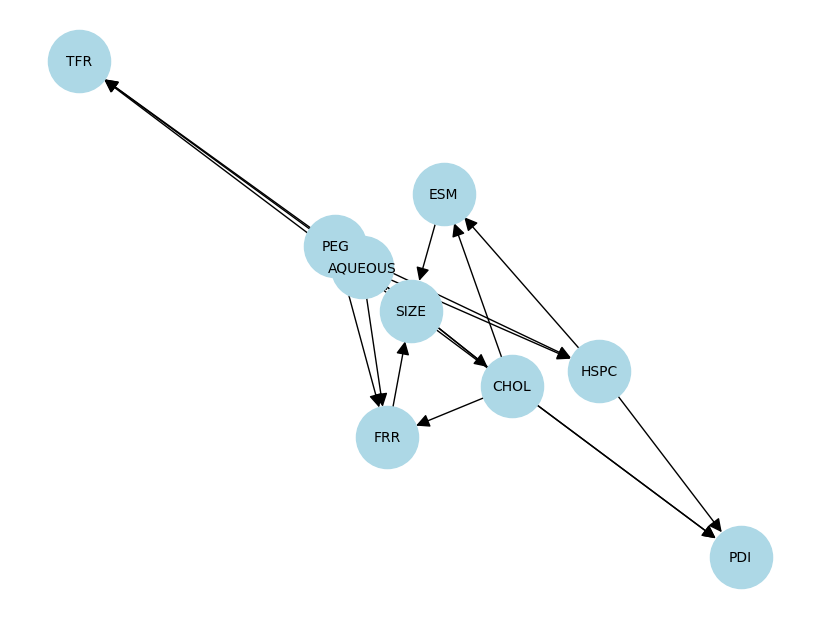

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_color="lightblue", node_size=2000, arrowsize=20, font_size=10)
plt.show()

## Model validation with the DAG

**Pipeline**
- The DAG encodes the "ground truth", in particular it shows which paths are causal and which are spurious
- Adjustment sets show the "recipe" to estimate causal effects from data (e.g. if PEG->PDI has no valid adjustment set or has effect ~0 after adjustment then any strong dependence between the two variables in the trained model is spurious
- We can then estimate the causal effect of X on Y using the DAG on the dataset and measure the model sensitivity to X (by small perturbations). We can also stress-test spurious paths by taking a node that is forbidden to adjust for (e.g. a collider), shuffle it within its parents (so that causal structure is preserved) and check if prediction "collapse".
- The trained model is "valid wrt the DAG" of its predictive behaviour changes primarily along true causal paths, it does not collapse wehn we break spurious correlations or forbidden paths and the estimated model sensitivity roughly matches the causal effects implied by the DAG.

**Note:** A model can have high predictive accuracy yet be not valid in a causal sense.

### Convert DAG to causal model

In [9]:
import collections
import collections.abc
collections.Iterable = collections.abc.Iterable
from causalgraphicalmodels import CausalGraphicalModel

CGM = CausalGraphicalModel(
    nodes=list(G.nodes),
    edges=list(G.edges)
)
#print("Is DAG:", nx.is_directed_acyclic_graph(G))

### Globals

In [10]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline as SkPipeline
import numpy as np

In [11]:
from typing import List, Sequence, Tuple

In [12]:
_rng = np.random.default_rng(0)

TARGETS = ["SIZE", "PDI"]

FEATURE_COLS = [c for c in df.columns if c not in TARGETS]
_df_feat = df[FEATURE_COLS].copy()

CATEGORICAL_COLS = [
    c for c in _df_feat.columns
    if pd.api.types.is_object_dtype(_df_feat[c])
    or pd.api.types.is_categorical_dtype(_df_feat[c])
    or pd.api.types.is_bool_dtype(_df_feat[c])
]

NUMERIC_COLS = [c for c in _df_feat.columns if c not in CATEGORICAL_COLS]

/tmp/ipython-input-1027952458.py:11: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  or pd.api.types.is_categorical_dtype(_df_feat[c])


In [13]:
IS_PIPELINE = isinstance(model, SkPipeline)
TRANSFORMER = None
if not IS_PIPELINE:
    try:
        ohe = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
    except TypeError:
        ohe = OneHotEncoder(handle_unknown="ignore", sparse=False)
    TRANSFORMER = ColumnTransformer(
        transformers=[
            ("num", "passthrough", NUMERIC_COLS),
            ("cat", ohe, CATEGORICAL_COLS),
        ],
        remainder="drop"
    ).fit(_df_feat)

### Auxiliaries

In [14]:
def transform_for_model(D: pd.DataFrame):
    """Prepare features for prediction.

    Args:
        D (pd.DataFrame): Input DataFrame.

    Returns:
        np.ndarray or pd.DataFrame: Transformed feature matrix.
    """
    X = D[FEATURE_COLS]
    return X if IS_PIPELINE else TRANSFORMER.transform(X)


def predict_any(m, D: pd.DataFrame) -> np.ndarray:
    """Predict outputs using a model.

    Args:
        m: Trained model with predict/predict_proba methods.
        D (pd.DataFrame): Input DataFrame.

    Returns:
        np.ndarray: Model predictions or probabilities.
    """
    Xmat = transform_for_model(D)
    try:
        proba = m.predict_proba(Xmat)
        proba = np.asarray(proba)
        if proba.ndim == 2 and proba.shape[1] >= 2:
            return proba[:, 1].astype(float)
        return proba.astype(float)
    except Exception:
        pass
    pred = m.predict(Xmat)
    return np.asarray(pred, dtype=float)

In [15]:
def parents(G: nx.DiGraph, n: str) -> List[str]:
    """Get observed parents of a node.

    Args:
        G (nx.DiGraph): DAG.
        n (str): Node name.

    Returns:
        List[str]: Parent nodes present in df.
    """
    return [p for p in G.predecessors(n) if p in df.columns]


def all_backdoor_sets_observed(X: str, Y: str, observed_cols: set) -> List[frozenset]:
    """Find valid backdoor sets limited to observed columns.

    Args:
        X (str): Treatment variable.
        Y (str): Outcome variable.
        observed_cols (set): Columns available in data.

    Returns:
        List[frozenset]: Valid adjustment sets.
    """
    sets = CGM.get_all_backdoor_adjustment_sets(X, Y) or set()
    filt = [frozenset(s) for s in sets if s.issubset(observed_cols) and X not in s and Y not in s]
    return sorted(set(filt), key=lambda s: (len(s), list(sorted(s))))


def pick_minimal_set(sets: Sequence[frozenset]) -> List[str]:
    """Pick the smallest valid adjustment set.

    Args:
        sets (Sequence[frozenset]): Candidate sets.

    Returns:
        List[str]: Minimal adjustment set, or empty if none.
    """
    return list(sorted(sets[0])) if sets else []

In [16]:
def estimate_effect_adjusted(df: pd.DataFrame, X: str, Y: str, Z: List[str]) -> Tuple[float, str]:
    """Estimate causal effect of X on Y with adjustment.

    Fits an OLS model if Y is numeric or a logistic model if Y is binary.
    For categorical X, returns the sum of absolute dummy coefficients.

    Args:
        df (pd.DataFrame): Input data.
        X (str): Treatment variable.
        Y (str): Outcome variable.
        Z (List[str]): Adjustment variables.

    Returns:
        Tuple[float, str]: Estimated effect and method used.
    """
    cols = [c for c in [Y, X] + Z if c in df.columns]
    data = df[cols].dropna()
    if len(data) < 30:
        return (np.nan, "insufficient_data")

    y = data[Y]
    XZ = pd.get_dummies(data[[X] + Z], drop_first=True)

    if X in XZ.columns:
        x_cols = [X]
    else:
        x_cols = [c for c in XZ.columns if c.startswith(f"{X}_")]
        if not x_cols:
            return (np.nan, "x_not_in_design_matrix")

    try:
        import statsmodels.api as sm
        XZ_sm = sm.add_constant(XZ, has_constant="add")
        if pd.api.types.is_numeric_dtype(y):
            model_sm = sm.OLS(y, XZ_sm).fit()
            eff = (float(model_sm.params.get(x_cols[0], np.nan)) if len(x_cols) == 1
                   else float(np.sum(np.abs([model_sm.params.get(c, 0.0) for c in x_cols]))))
            return (eff, "statsmodels_ols")
        else:
            y_bin = y.astype("category").cat.codes
            model_sm = sm.Logit(y_bin, XZ_sm).fit(disp=False)
            eff = (float(model_sm.params.get(x_cols[0], np.nan)) if len(x_cols) == 1
                   else float(np.sum(np.abs([model_sm.params.get(c, 0.0) for c in x_cols]))))
            return (eff, "statsmodels_logit")
    except Exception:
        from sklearn.linear_model import LinearRegression, LogisticRegression
        if pd.api.types.is_numeric_dtype(y):
            lr = LinearRegression().fit(XZ, y)
            coef_map = dict(zip(XZ.columns, lr.coef_))
            eff = (float(coef_map.get(x_cols[0], np.nan)) if len(x_cols) == 1
                   else float(np.sum(np.abs([coef_map.get(c, 0.0) for c in x_cols]))))
            return (eff, "sklearn_ols")
        else:
            y_bin = y.astype("category").cat.codes
            clf = LogisticRegression(max_iter=1000).fit(XZ, y_bin)
            coef_map = dict(zip(XZ.columns, clf.coef_.ravel()))
            eff = (float(coef_map.get(x_cols[0], np.nan)) if len(x_cols) == 1
                   else float(np.sum(np.abs([coef_map.get(c, 0.0) for c in x_cols]))))
            return (eff, "sklearn_logit")

In [17]:
def probe_values_for_feature(series: pd.Series, max_levels: int = 4) -> List:
    """Select representative probe values for a feature.

    Args:
        series (pd.Series): Feature column.
        max_levels (int, optional): Max categories to keep for non-numeric. Defaults to 4.

    Returns:
        List: Numeric quantiles or top categorical values.
    """
    if pd.api.types.is_numeric_dtype(series):
        vals = series.dropna().values
        if len(vals) == 0:
            return []
        return list(np.unique(np.quantile(vals, [0.1, 0.5, 0.9])))
    else:
        vals = series.dropna().value_counts().index.tolist()
        return vals[:max_levels]


def model_sensitivity_given_Z(m, df: pd.DataFrame, Y: str, X: str, Z: List[str]) -> float:
    """Compute model sensitivity to X given adjustment set Z.

    Args:
        m: Trained model with predict/predict_proba.
        df (pd.DataFrame): Input data.
        Y (str): Outcome variable.
        X (str): Feature under test.
        Z (List[str]): Adjustment variables.

    Returns:
        float: Sensitivity as prediction range across probe values.
    """
    base = df.dropna(subset=[c for c in [X] + Z if c in df.columns]).copy()
    if base.empty:
        return np.nan
    probes = probe_values_for_feature(base[X])
    if len(probes) <= 1:
        return 0.0
    means = []
    for v in probes:
        temp = base.copy()
        temp.loc[:, X] = v
        preds = predict_any(m, temp)
        means.append(float(np.mean(preds)))
    return float(np.max(means) - np.min(means))

In [18]:
def shuffle_within_bins(df: pd.DataFrame, col: str, bin_cols: List[str]) -> pd.DataFrame:
    """Shuffle a column within groups defined by bin_cols.

    Args:
        df (pd.DataFrame): Input data.
        col (str): Column to shuffle.
        bin_cols (List[str]): Columns defining grouping bins.

    Returns:
        pd.DataFrame: DataFrame with col shuffled within bins.
    """
    out = df.copy()
    if not bin_cols:
        out.loc[:, col] = _rng.permutation(out[col].values)
        return out
    for _, g in out.groupby(bin_cols, dropna=False):
        idx = g.index
        out.loc[idx, col] = _rng.permutation(out.loc[idx, col].values)
    return out


def shuffle_delta(m, df: pd.DataFrame, Y: str, X: str, parent_cols: List[str]) -> float:
    """Measure prediction change after shuffling X within its parents.

    Args:
        m: Trained model with predict/predict_proba.
        df (pd.DataFrame): Input data.
        Y (str): Outcome variable.
        X (str): Feature to shuffle.
        parent_cols (List[str]): Parent columns for conditional shuffling.

    Returns:
        float: Mean absolute change in predictions.
    """
    needed = [c for c in [X] + parent_cols if c in df.columns]
    base = df.dropna(subset=needed).copy()
    if base.empty:
        return np.nan
    p0 = predict_any(m, base)
    broken = shuffle_within_bins(base, X, parent_cols)
    p1 = predict_any(m, broken)
    return float(np.mean(np.abs(p0 - p1)))

In [19]:
def audit_for_target(m, df: pd.DataFrame, G: nx.DiGraph, Y: str) -> pd.DataFrame:
    """Audit model behavior for a target using a DAG.

    Args:
        m: Trained model with predict/predict_proba.
        df (pd.DataFrame): Input data.
        G (nx.DiGraph): Causal DAG.
        Y (str): Target variable.

    Returns:
        pd.DataFrame: Audit results including causal effects,
        sensitivities, shuffle deltas, and spurious flags.
    """
    observed = set(df.columns)
    features = [c for c in df.columns if c != Y]
    rows = []
    for X in features:
        if X not in G.nodes:
            continue
        adjsets = all_backdoor_sets_observed(X, Y, observed)
        Z = pick_minimal_set(adjsets)
        eff, eff_method = estimate_effect_adjusted(df, X, Y, Z)
        sens = model_sensitivity_given_Z(m, df, Y, X, Z)
        par = parents(G, X)
        sdel = shuffle_delta(m, df, Y, X, par)
        rows.append({
            "target": Y,
            "feature": X,
            "adj_set": tuple(Z),
            "num_adj_candidates": len(adjsets),
            "effect_adj": eff,
            "effect_method": eff_method,
            "model_sensitivity": sens,
            "shuffle_delta": sdel,
            "parents_of_feature": tuple(par),
        })
    res = pd.DataFrame(rows)
    if res.empty:
        return res
    # Heuristic spurious flag
    res["eff_abs"] = res["effect_adj"].abs()
    res["eff_abs_pct"] = res["eff_abs"].rank(pct=True)
    res["sens_pct"] = res["model_sensitivity"].rank(pct=True)
    res["shuffle_pct"] = res["shuffle_delta"].rank(pct=True)
    res["spurious_flag"] = (
        (res["eff_abs_pct"] <= 0.30) &
        ((res["sens_pct"] >= 0.70) | (res["shuffle_pct"] >= 0.70))
    )
    res = res.sort_values(
        by=["spurious_flag", "sens_pct", "shuffle_pct", "eff_abs_pct"],
        ascending=[False, False, False, True]
    ).reset_index(drop=True)
    return res

### Results

In [20]:
all_results = [audit_for_target(model, df, G, tgt) for tgt in TARGETS]
audit_table = pd.concat(all_results, ignore_index=True)
cols_to_show = [
    "target", "feature", "adj_set", "num_adj_candidates",
    "effect_adj", "model_sensitivity", "shuffle_delta", "spurious_flag"
]
print(audit_table[cols_to_show].head(50))
audit_table.to_csv("causal_audit_results_rf_only.csv", index=False)

   target  feature                adj_set  num_adj_candidates   effect_adj  \
0    SIZE      ESM         (AQUEOUS, FRR)                  15    20.075196   
1    SIZE      FRR         (AQUEOUS, ESM)                  11    -5.096904   
2    SIZE     CHOL             (AQUEOUS,)                   1   -72.842841   
3    SIZE      TFR         (AQUEOUS, PEG)                  39   146.491568   
4    SIZE     HSPC         (AQUEOUS, PEG)                   5   -21.159840   
5    SIZE  AQUEOUS                     ()                   1   233.515713   
6    SIZE      PEG        (AQUEOUS, CHOL)                   1   -81.184257   
7    SIZE      PDI           (CHOL, HSPC)                  43  4163.984943   
8     PDI      FRR  (AQUEOUS, CHOL, HSPC)                   6     0.002231   
9     PDI     CHOL             (AQUEOUS,)                   1    -0.026887   
10    PDI      ESM           (CHOL, HSPC)                   8     0.010348   
11    PDI      TFR   (AQUEOUS, PEG, SIZE)                  28   

**Note**. We have the following table elements:
- `effect_adj` shows the causal effect of a feature on a target estimated via adjustment sets.
- `model_sensitivity` shows how much the model's predictions move when a feature is perturbed.
- `shuffle_delta` shows how much predictions change when you shuffle the feature within its parent bins (stress-test).
- `spurious_flag` is an heuristic that evaluates to `True`if the model is very sensitive to a feature whose causal effect is estimated to be small (likely relying on spurious correlations).


There are 3 "strong red flags": SIZE<-ESM moderate effect (20) but sesnitivity is 285 and shuffle impact 3.8 which means that the model is more reactive then DAG says. Likewise SIZE<-FRR and PDI<-FRR.

There are also "good news" looking at rows 2,3,15. The result in row 7 is ambiguous, but this is expected since sensitivity 0 likely means that the model is not using PDI at all when predicting size (but the DAG says there is a strong effect).

**Possible next steps**
- Mitigate removing FRR and ESM from the features or penalize the model's reliance on them
- Run the same "audit" on single-target model and compare
- Counterfactual augmentartion by generating counterfactual samples by perturbing spurious features while holding adjustment sets fixed to teach the model that those changes shouldn't alter the target
- Balancing the dataset (if some parent-child combos are rare the model may under-learn those causal effects)
- Intervention-style augmentation (use DAG knowledge to simulate interventions by perturbing values within realistic ranges, for spurious variables intervene but don't change the targets thus reinforcing their irrelevance)